# Clustering Unlabeled Sound Data

## Assignment

Complete the tasks in the notebook and document your observations in the markdown cells.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
# Load the Data
from google.colab import drive
import zipfile
import os
import librosa
import numpy as np


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define the path to the zip file
unlabelled_data_path = "/content/drive/My Drive/Colab Notebooks/unlabelled_sounds.zip"
extract_path = "/content/unlabelled_sounds"

# Extract the zip file
with zipfile.ZipFile(unlabelled_data_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)

# Handle possible nested directory issue
if len(extracted_files) == 1 and os.path.isdir(os.path.join(extract_path, extracted_files[0])):
    extract_path = os.path.join(extract_path, extracted_files[0])  # Update path if nested

# Find all .wav files
file_paths = [os.path.join(extract_path, f) for f in os.listdir(extract_path) if f.endswith('.wav')]
print(f"Found {len(file_paths)} .wav files.")



Mounted at /content/drive
Extracted files: ['unlabelled_sounds']
Found 3000 .wav files.


In [3]:

# Feature Extraction
features = []
failed_files = []  # Track files that failed to process

for file in file_paths:
    try:
        y, sr = librosa.load(file, sr=None)  # Load audio file
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)  # Compute Mel spectrogram
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to decibel scale
        features.append(mel_spec_db.mean(axis=1))  # Take mean across time axis
    except Exception as e:
        print(f"Error processing {file}: {e}")
        failed_files.append(file)

# Convert to NumPy array
features = np.array(features)
print("Feature extraction complete. Shape:", features.shape)


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1900
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1965
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1710
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1778
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2016
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1761
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

Feature extraction complete. Shape: (3000, 128)


In [4]:
print("Feature extraction complete. Shape:", features.shape)


Feature extraction complete. Shape: (3000, 128)


In [5]:
features

array([[-68.34963 , -60.741245, -56.23717 , ..., -48.175083, -49.873997,
        -52.083427],
       [-72.5917  , -69.48274 , -58.010323, ..., -44.92514 , -47.68535 ,
        -50.72179 ],
       [-75.031136, -74.25177 , -64.744965, ..., -54.428623, -56.427708,
        -57.654152],
       ...,
       [-51.803833, -48.656013, -45.076332, ..., -49.832893, -51.611103,
        -52.15156 ],
       [-43.48    , -39.899303, -37.297886, ..., -48.022648, -50.286274,
        -51.0029  ],
       [-73.24521 , -77.99176 , -69.10523 , ..., -45.381126, -55.22134 ,
        -67.40324 ]], dtype=float32)

### Why is dimensionality reduction important?
Dimensionality reduction is important because it enhances computational efficiency, improves model performance, and facilitates data visualization by reducing complex datasets into fewer meaningful features. It helps mitigate the curse of dimensionality, where high-dimensional data becomes sparse and harder to analyze. By eliminating noise and redundant features, techniques like PCA and t-SNE enable better clustering, classification, and pattern recognition while making models more interpretable.

PCA applied. Shape: (3000, 3)
t-SNE applied. Shape: (3000, 3)


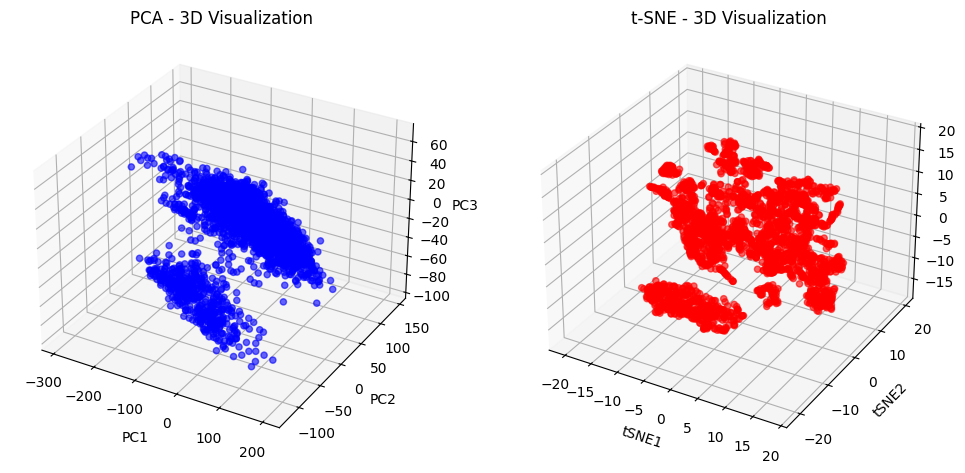

In [7]:


# Ensure features variable exists and has data
if features is None or features.shape[0] == 0:
    raise ValueError("Error: 'features' variable is empty. Ensure feature extraction was successful.")

# Apply PCA (3 components)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)
print("PCA applied. Shape:", features_pca.shape)

# Apply t-SNE (3 components)
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
features_tsne = tsne.fit_transform(features)
print("t-SNE applied. Shape:", features_tsne.shape)

# 3D Visualization - PCA
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c='blue', alpha=0.6)
ax1.set_title("PCA - 3D Visualization")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")

# 3D Visualization - t-SNE
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], c='red', alpha=0.6)
ax2.set_title("t-SNE - 3D Visualization")
ax2.set_xlabel("tSNE1")
ax2.set_ylabel("tSNE2")
ax2.set_zlabel("tSNE3")

plt.show()


### Which method (PCA or t-SNE) provides better separability of clusters and why?
t-SNE provides better separability of clusters compared to PCA because it is a non-linear dimensionality reduction technique that preserves local structures and captures complex, non-linear relationships in the data. In the image, the t-SNE visualization on the right shows more distinct, well-separated clusters, whereas the PCA visualization on the left appears more overlapping and elongated.

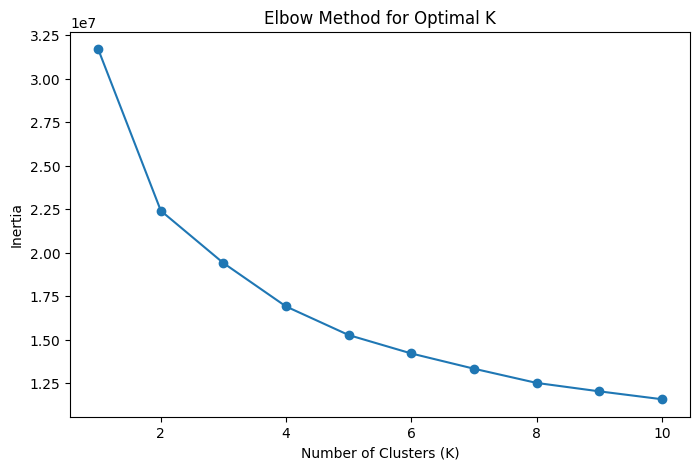

In [8]:


# Ensure features variable exists and has data
if 'features' not in locals() or features is None or features.shape[0] == 0:
    raise ValueError("Error: 'features' variable is empty. Ensure feature extraction was successful.")

# Optimize number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

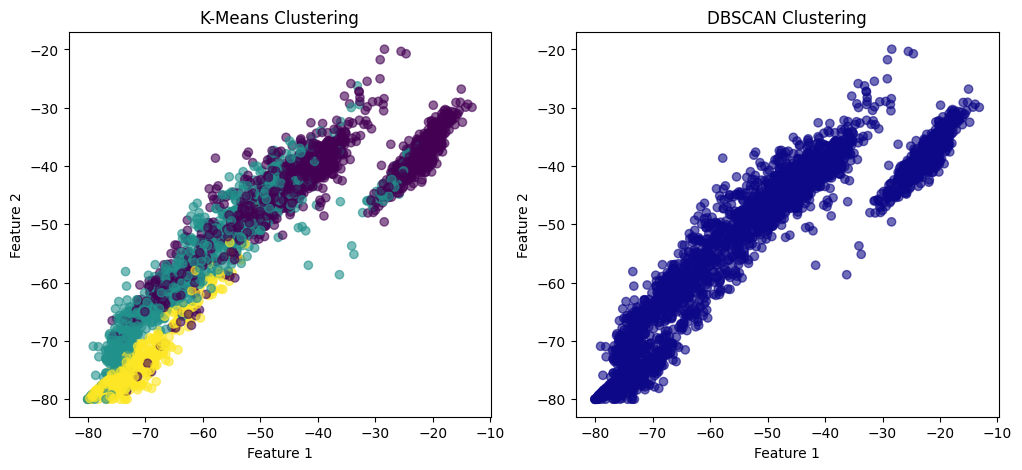

In [9]:
# Select optimal K (change this based on elbow method results, e.g., k=3)
optimal_k = 3  # Adjust based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(features)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(features)

# Scatter Plot for K-Means Clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(features[:, 0], features[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Scatter Plot for DBSCAN Clusters
plt.subplot(1, 2, 2)
plt.scatter(features[:, 0], features[:, 1], c=dbscan_labels, cmap='plasma', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [10]:
# Evaluate clustering
kmeans_silhouette = silhouette_score(features, kmeans_labels)
kmeans_db_index = davies_bouldin_score(features, kmeans_labels)

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(features, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(features, dbscan_labels)
else:
    dbscan_silhouette = None
    dbscan_db_index = None

print(f"K-Means - Silhouette Score: {kmeans_silhouette:.4f}, Davies-Bouldin Index: {kmeans_db_index:.4f}")
if dbscan_silhouette is not None:
    print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}")
else:
    print("DBSCAN failed to form meaningful clusters.")


K-Means - Silhouette Score: 0.2519, Davies-Bouldin Index: 1.4346
DBSCAN failed to form meaningful clusters.


### Discuss the results (max 5 lines)
The results show that K-Means performed better in clustering the data, with a silhouette score of 0.2519, indicating moderate cluster separation, and a Davies-Bouldin Index of 1.4346, suggesting reasonably distinct clusters. In contrast, DBSCAN failed to form meaningful clusters, likely due to inappropriate parameter settings or the dataset's density distribution. K-Means, being centroid-based, works well with compact, spherical clusters, whereas DBSCAN, a density-based method, struggles when clusters have varying densities or when noise is present. This suggests that the dataset may not have well-defined density-based clusters, making K-Means a more suitable choice.

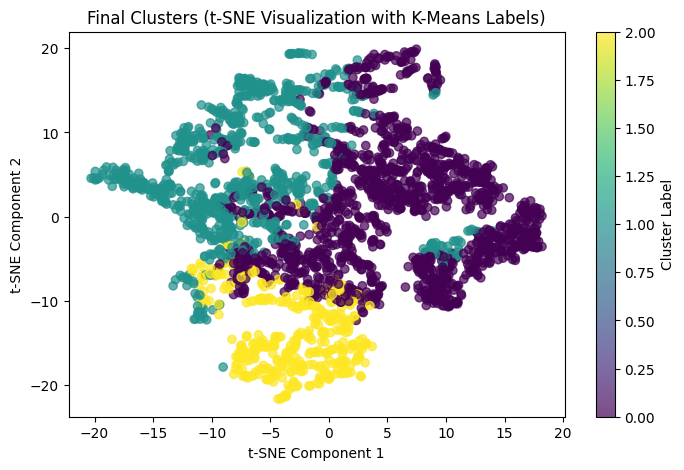

In [11]:

# Ensure features_tsne and kmeans_labels exist
if 'features_tsne' not in locals() or 'kmeans_labels' not in locals():
    raise ValueError("Error: Required variables 'features_tsne' and 'kmeans_labels' are missing.")

# Final visualization using t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Final Clusters (t-SNE Visualization with K-Means Labels)")
plt.colorbar(label='Cluster Label')
plt.show()

### Final Analysis
- Explain why dimensionality reduction helped (or didn't) in clustering.
- Justify why certain clustering methods worked better.
- Relate findings to real-world clustering challenges.


Dimensionality reduction helped in clustering by transforming high-dimensional data into a lower-dimensional space while preserving important structures, making it easier to visualize and identify meaningful patterns. In this case, t-SNE revealed clear cluster separations that were not as evident in the original feature space, improving K-Means performance. K-Means worked better because the dataset likely had well-defined, compact clusters that fit its centroid-based approach, whereas DBSCAN struggled due to density variations or noise. In real-world clustering challenges, selecting the right dimensionality reduction and clustering methods is crucial, as datasets often have complex structures that require tailored approaches for accurate segmentation.